# Summer 2021 Data Science Intern Challenge
Mehrzad Mirzaei nejad




Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. 
We want to do some analysis of the average order value (AOV). 
When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. 
Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import statistics
import seaborn as sns


In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"
    
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


df = pd.read_csv(url_1)



# Initial Study of the Data set

In [3]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
df.shape

(5000, 7)

In [6]:
# Check the missing valuse:
df.columns[df.isna().any()]

Index([], dtype='object')

In [7]:
print(df.isnull().sum().sum()) 

0


# How the current AOV is calculated

In [8]:
# the AOV is comming from the mean of order_amount culomn

np.mean(df['order_amount'])

3145.128

In [9]:
# in faact they have used count of total items to calculate mean

order_s = df['order_amount'].sum()
items_c = df['total_items'].count()
AOV = order_s/items_c
AOV

3145.128

# Some simple ideas to calculate a better AOV for the same dataset



1-One option could be to calculate the average price based on the shops.

In [10]:
a=df.groupby("shop_id", as_index=False)[["order_amount", "total_items"]].sum()
a['avg_order'] = a['order_amount'] / a['total_items']
np.mean(a['avg_order'])

407.99

.




2- The second option could be to calculate the average price based on the different customers.

In [11]:
b=df.groupby("user_id", as_index=False)[["total_items", "order_amount"]].sum()
b['avg_order'] = b['order_amount']/ b['total_items']
np.mean(b['avg_order'])

400.20291584943715

.



3- The 3rd option could be to calculate the mean of scaled values 

In [12]:
df['orders_to_one'] = df['order_amount'] / df['total_items']
np.mean(df['orders_to_one'])

387.7428

.


4- The 4th option could be to use items.sum() instead of items.count()

In [13]:
# If they wanted to be a little bit more accurate they could use sum instead of count for total items:
order_s = df['order_amount'].sum()
items_s = df['total_items'].sum()
AOV = order_s/items_s
AOV

357.92152221412965

.

5- The prefered option which I'm gonna explain is using MEDIAN instead of mean

In [14]:
np.median(df['order_amount'])

284.0

.



# Study the simple statistics

In [15]:
# Lets see the descriptive statistics of two columns
df[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


.

The statistics above say:

1-The mean order value is very high; approximately 3145.128000

2-There is an incredibly large standard deviation of 41282.54. This means that on average, the values vary 41,282.54 from the mean, clearly showing that the mean is not a useful representation of the AOV.

3-The max order value (704,000) is much higher than expected. 

Because of this, I would guess that there are some outliers which are causing the mean to be that large.


.


.

# Study of the highest order amounts and box plots

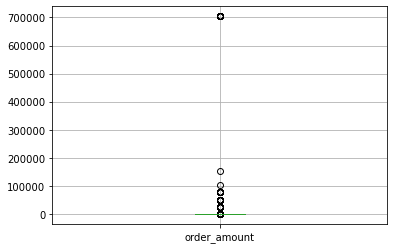

In [16]:
# To get a sense of the distribution, let's look at a box plot of the data and possibly see our outliers.
df.boxplot('order_amount')

.

There is no box except a line along 0! It seems there are lots of outliers. 
To find the outliers, I group the data by order amount sorted in ascending order, counting the number of entries per each value.
.

In [17]:
amounts_count = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
amounts_count.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


.

Above I can see the spread of the outliers! Interestingly, some of the high order amounts such as (704000, 77175, 51450, 25725) are repeatd so many times. This could be a reason for our large mean order value!

Now, let's take a look at these high ordered values in more details.

.

In [18]:
high_orders= df.loc[df['order_amount'].isin([704000, 51450, 25725])]
high_orders.sort_values(by='order_amount', ascending=False)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,orders_to_one
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0


Interesting insights. 
It appears the order amounts of 704000 occur at the same time each day for the same store and users. Seems it is kind of bulk purchasing since the items are constantly 2000.

The 4th and 5th row seems to be a duplicate of the 3th row, causing an unexpectedly high increase in the overall statistics. 

The data for order amounts of 51450 and 25725 are also similar. They all come from the same store id 78. Orders of 51450 are just transactions of just two items worth 25725.



# Study of the total item no

In [19]:
df.groupby('total_items').order_amount.count().sort_values(ascending=False)

total_items
2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: order_amount, dtype: int64

There are 17 transactions with 2000 item numbers.Let's inspect this further.

.

In [20]:
highest_item_no= df[df['total_items'] == 2000]
highest_item_no


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,orders_to_one
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


In [21]:
# also I investigate the order time of these transactions


# "created_at" is an object date column and I convert it to datetime column so I can sort it

from datetime import datetime
df['created_at'] = pd.to_datetime(df['created_at'])





highest= df[df['total_items'] == 2000].sort_values(by='created_at', ascending=False)
highest

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,orders_to_one
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00,352.0
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
4868,4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0


It is seen that all of the recorded transactions of size 2000 occurred from the same user_id (607) of the same shop_id (42), with the same the order_amount of 704000. 
Moreover, In some days there are multiple identical transactions, and all purchases are made at exactly 4 a.m.

.

# Study of the maximum order amount

In [22]:
df['a']=df['order_amount']/df['total_items']

df.groupby('total_items').a.max()


total_items
1       25725.0
2       25725.0
3       25725.0
4       25725.0
5         352.0
6       25725.0
8         133.0
2000      352.0
Name: a, dtype: float64


When inspecting the maximum order amounts divided by the total items bought for the various transaction sizes, I see 25725 for purchases of 1 item, 2 items, 3 items, 4 items and 6 items. It is not believable an average pair of shoes to cost 25725; probably this is a recording mistake or kind of special purchasing.

Let's take a look at a scatterplot which shows the order amount for each of our 5000 transactions.

# Study of the scatter plot of the order amounts for the transactions

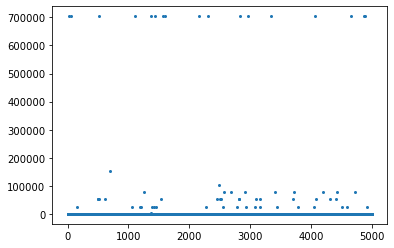

In [23]:
plt.scatter(x=df['order_id'], y=df['order_amount'], s=4)
plt.show()

From this scatter plot, I can see that the 3145.13 AOV was a resulted of the significant amount of outliers with an ‘order amount‘ in the range of 700,000. In fact the AOV, is largely affected by these extreme values in this dataset, both from the 2000 item purchases and from the order that were multiples of 25725. 


To protect othe evaluation metric from the effects of these outliers, I prefer to use the median, which will be found among the points in the dark blue line.

.


Observing the plot above, I would choose to study the median of the data because it is more accurately represented than the mean (as the effect on outliers is much lower).

Let's look at a median distribution with a range of +/- 1.5.

# Outlier removal

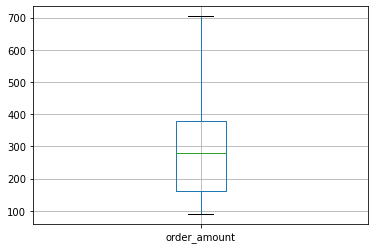

In [24]:
# To better evaluate this data, we can clean some of the values. Let's try plotting only values that are the 
# median +/- 1.5 times the interquartile range

q1 = df['order_amount'].quantile(q=0.25)
q2 = df['order_amount'].quantile(q=0.5)
q3 = df['order_amount'].quantile(q=0.75)
IQR = q3 - q1



df_trunc = df[(df['order_amount'] < q3 + IQR * 1.5) & (df['order_amount'] > q1 - IQR * 1.5)]
df_trunc.boxplot(column='order_amount', showfliers=False)



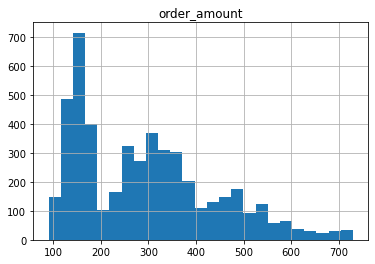

In [25]:
df_trunc.hist(column='order_amount', bins = 'auto')
plt.show()

Now I have a cleaner distribution. Use of df_trunc will provide a more accurate dataset for shopper and buyer analysis.

.
.


In [26]:
# Average amount per order
np.mean(df_trunc['order_amount'])

293.7153735336489

# b. What metric would you report for this dataset?

The box plot for df_truncated reveals that the distribution is skewed towards lower values. 
Having this said, I would prefer the median value of the truncated dataset. Because the values above the median can increase the mean inproporly.


Statistically speaking, there is one metric which is not affected that much by the outliers which is the median of the data. 

# c. What is its value?

We can observe the value of our median from the describe() function at the 50% as $280. It also shows that the standard deviation is 144.45, a much more reasonable result.

In [27]:
df_trunc.order_amount.describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

In [28]:
# or
np.median(df_trunc['order_amount'])

280.0

# QUESTION 2

a. How many orders were shipped by Speedy Express in total?

```SQL
SELECT COUNT(OrderID)
FROM Orders
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express'
```
Result: 54

b. What is the last name of the employee with the most orders?

```SQL
SELECT e.LastName, COUNT(*) AS num_orders
FROM Employees e JOIN Orders o ON e.EmployeeID = o.EmployeeID
GROUP BY e.LastName
ORDER BY num_orders DESC
LIMIT 1;
```

Employee's last name: `Peacock` with `40` orders.

c. What product was ordered the most by customers in Germany?

```SQL
SELECT p.ProductID, p.productName, SUM(od.Quantity) AS total_quantity
FROM OrderDetails od JOIN Orders o ON o.OrderID = od.orderID
JOIN Products p ON od.productID = p.productID
JOIN Customers c ON c.CustomerID = o.CustomerID
WHERE c.Country = 'Germany'
GROUP BY p.productID
ORDER BY total_quantity DESC
LIMIT 1;
```

The product: `Boston Crab Meat` with total orders = `160`.